<b> Objective : To estimate\ Predict the Crop Yield

In [19]:
# Importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
#Reading data .csv file
Ag_data=pd.read_csv('Agriculture.csv')
Ag_data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [21]:
# Understanding the datatypes for each column
Ag_data.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [22]:
# Understanding the information that we have for each column
Ag_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


Number_Weeks_Used have some Null Values, from above data representation.

----

In [23]:
# Identifying Null Values using ISNULL () method
Ag_data.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

442 Nulls found in Number_Weeks_Used column.

<b> Handling Nulls

In [33]:
# Replacing Null value with 0

Ag_data=Ag_data.fillna(0)

In [34]:
# No Nulls found post filling Null space with 0

Ag_data.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

----

<b> Checking Statistical correlation of the dataset

In [27]:
# Checking statistical data
Ag_data.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [28]:
# Correlated data 
Ag_data.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.449470,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002237,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.098399,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.387982,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.104022,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.449470,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467386,-0.011108,0.244988
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.467386,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.011108,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.244988,-0.152918,-0.016196,1.000000


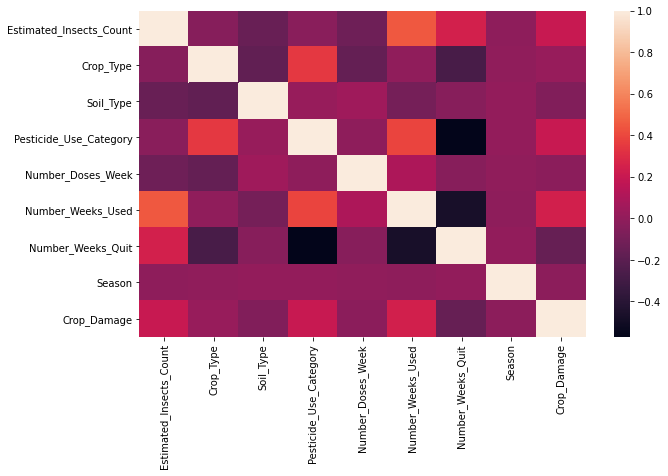

In [29]:
# Heatmap presentation of correlation
plt.figure(figsize=(10,6))
sns.heatmap(Ag_data.corr())
plt.show()

Here, almost every dimension is related to each other. Mainly, Insect count and number of weeks used.
Crop type and Pesticide used.

Season is having consisting ratio with other values throughout. 

---

<b> Checking for Outliers

<AxesSubplot:>

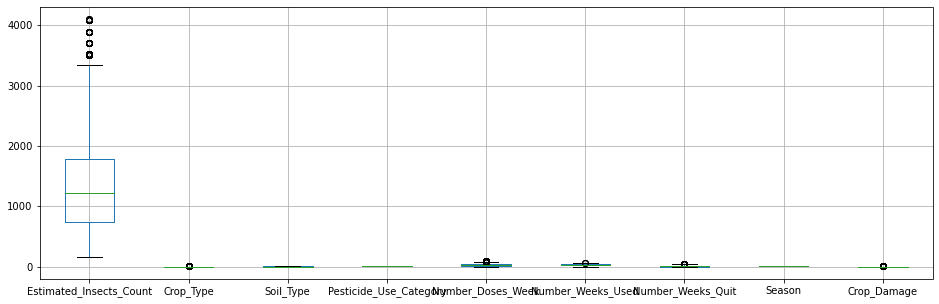

In [31]:
plt.figure(figsize=(16,5))
Ag_data.boxplot()

Not considering Insect count more that 3000 as outlier as it can be a real case.

array([[<AxesSubplot:title={'center':'Estimated_Insects_Count'}>,
        <AxesSubplot:title={'center':'Crop_Type'}>,
        <AxesSubplot:title={'center':'Soil_Type'}>],
       [<AxesSubplot:title={'center':'Pesticide_Use_Category'}>,
        <AxesSubplot:title={'center':'Number_Doses_Week'}>,
        <AxesSubplot:title={'center':'Number_Weeks_Used'}>],
       [<AxesSubplot:title={'center':'Number_Weeks_Quit'}>,
        <AxesSubplot:title={'center':'Season'}>,
        <AxesSubplot:title={'center':'Crop_Damage'}>]], dtype=object)

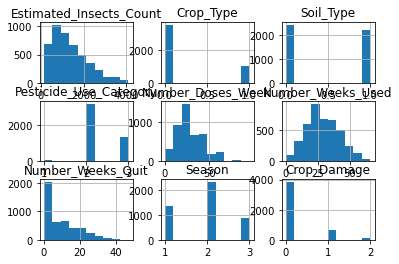

In [32]:
# Representing data on Histogram
Ag_data.hist()

Data is highly skewed either at right or left of the graph.

<b> Data visualisation

<AxesSubplot:xlabel='Crop_Type', ylabel='count'>

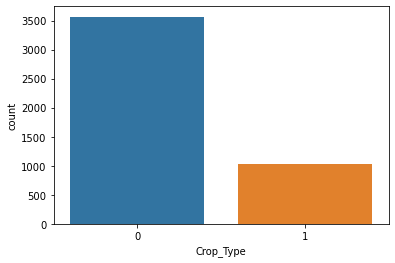

In [41]:
#Checking Relationships between various 

sns.countplot(x='Crop_Type',data=Ag_data)

<AxesSubplot:xlabel='Number_Doses_Week', ylabel='count'>

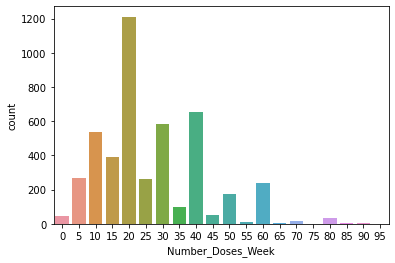

In [42]:
sns.countplot(x='Number_Doses_Week',data=Ag_data)

<AxesSubplot:xlabel='Number_Weeks_Used', ylabel='count'>

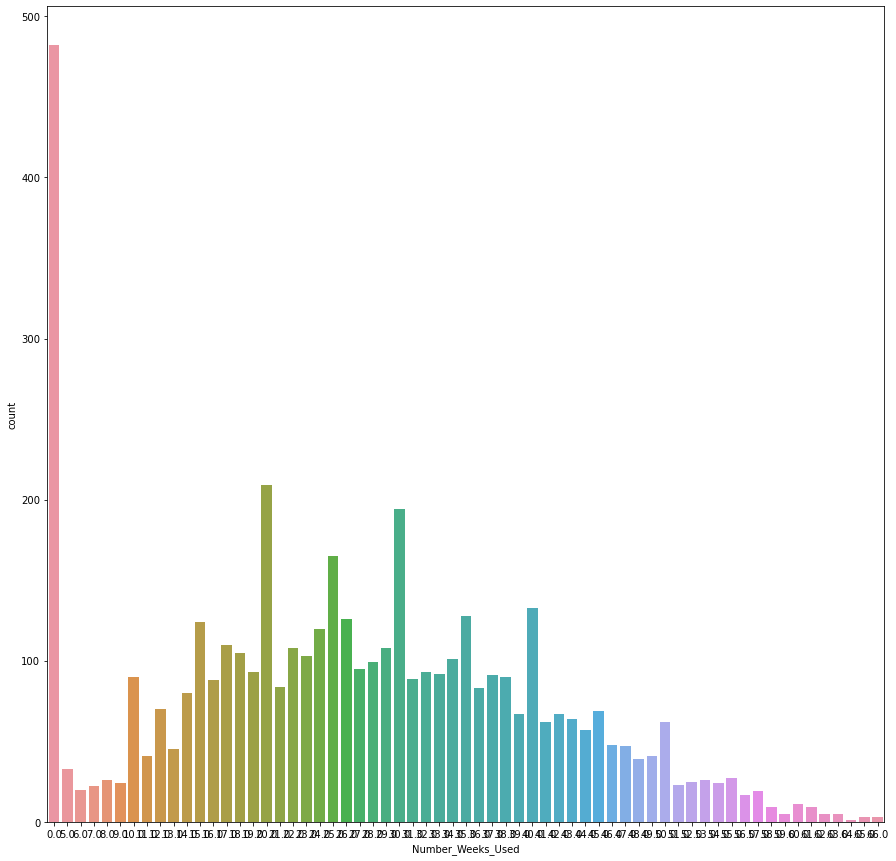

In [45]:
from matplotlib.pyplot import figure
figure(num=None,figsize=(15,15))
sns.countplot(x='Number_Weeks_Used',data=Ag_data)

<AxesSubplot:xlabel='Pesticide_Use_Category', ylabel='count'>

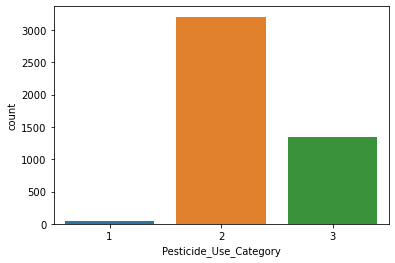

In [44]:
sns.countplot(x='Pesticide_Use_Category',data=Ag_data)

In [58]:
Ag_data.drop(['ID'],axis=1,inplace=True)

In [59]:
x=Ag_data.iloc[:,:-1]
y=Ag_data.iloc[:,8]

In [60]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test =train_test_split(x,y, test_size=0.2,random_state=0)

In [62]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('score of ', m,'is : ', m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('errors :')
    print('mean_absolute_error ',mean_absolute_error(y_test,predm))
    print('mean_squared_error ', mean_squared_error(y_test,predm))
    print('Root Mean ',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score',r2_score(y_test,predm))
    print('*************************************************************************************')
    print('\n')

score of  LinearRegression() is :  0.09911118184963841
errors :
mean_absolute_error  0.2780750882023831
mean_squared_error  0.16489970005256605
Root Mean  0.40607844076306987
r2_score 0.1040268967973762
*************************************************************************************


score of  DecisionTreeRegressor() is :  0.9923149231283422
errors :
mean_absolute_error  0.32717391304347826
mean_squared_error  0.41141304347826085
Root Mean  0.6414148762526957
r2_score -1.2353892769104355
*************************************************************************************


score of  KNeighborsRegressor() is :  0.3042443738859181
errors :
mean_absolute_error  0.2656521739130435
mean_squared_error  0.18530434782608698
Root Mean  0.43046991512309773
r2_score -0.006840591618734848
*************************************************************************************


score of  SVR() is :  -0.04449335695743595
errors :
mean_absolute_error  0.24958176345606436
mean_squared_error  0.19

Its a Classification Problem. Using Decision Classifier Algorithm to Identify if the Crop will be healthy or waste.

score of  DecisionTreeRegressor() is :  0.9923149231283422
errors :
mean_absolute_error  0.32717391304347826
mean_squared_error  0.41141304347826085
Root Mean  0.6414148762526957
r2_score -1.2353892769104355

In [68]:

from sklearn.datasets import load_iris
from sklearn import tree
x, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

[Text(446.4, 498.3, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(377.7230769230769, 407.70000000000005, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(515.0769230769231, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(274.7076923076923, 317.1, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(137.35384615384615, 226.5, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(68.67692307692307, 135.89999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(206.03076923076924, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(412.0615384615385, 226.5, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(343.38461538461536, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(480.73846153846154, 135.89999999999998, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(412.0615384615385, 45.29

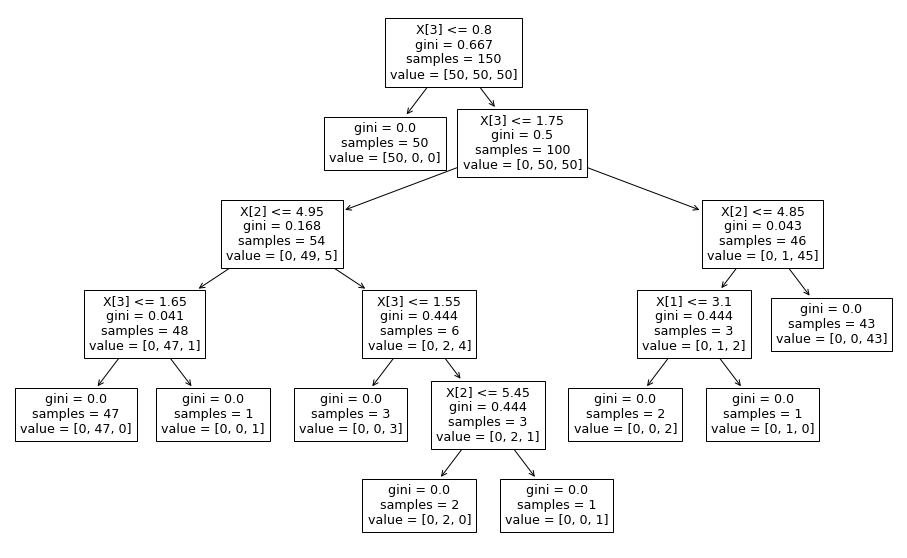

In [69]:
plt.figure(figsize=(16,10))
tree.plot_tree(clf) 
